# Problem Sheet 3

   ## 3.1. 

$$ f(x) = \frac{1}{4-x^2} $$

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import approximate_taylor_polynomial

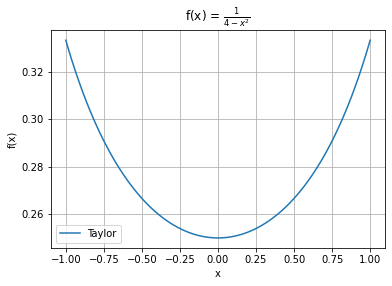

In [4]:
## using the neville_scheme from exercise 2
def Neville_Scheme(x, f, x_bar):
    Scheme = np.zeros((x.size, x.size))
    n = x.size - 1
    Scheme[:,0] = f
    for m in range(1,n+1):
        for j in range(0,n-m+1):
            Scheme[j][m] = ((x_bar - x[j])*Scheme[j+1][m-1] - (x_bar - x[j+m])*Scheme[j][m-1])/(x[j+m]-x[j])
    return Scheme

#we define our function
def f(x):
    return 1/(4-x**2)
np_f = np.vectorize(f)


#initial plot to see what we've got
eval_points = np.linspace(-1,1,100)
fig, ax = plt.subplots()
ax.plot(eval_points , np_f(eval_points), label='Taylor')
ax.set(xlabel='x', ylabel='f(x)', title="f(x) = $\\frac{1}{4-x^2}$")
# ax.invert_xaxis()
plt.legend()
plt.grid()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


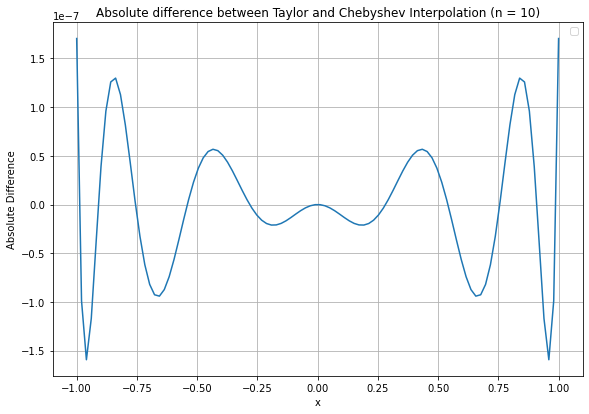

In [14]:
error_chebyshev = []
error_taylor = []

for n in range(1,21):
    
    chebyshev_knots = [math.cos(math.pi*(2*i + 1)/(2*n+2)) for i in range(0, n+1)]
    chebyshev_knots = np.array(chebyshev_knots)
    
    f_values = np.array(np_f(chebyshev_knots))
    f_taylor = approximate_taylor_polynomial(np_f, 0, 2*n, 1)
    
    chebyshev_eval = []
    taylor_2n_eval = []
    
    for eval_point in eval_points:
        chebyshev_scheme = Neville_Scheme(chebyshev_knots, f_values, eval_point)
        chebyshev_eval.append(chebyshev_scheme[0][n])
        taylor_2n_eval.append(f_taylor(eval_point))
        
    sanity_check_n = 10
    
    if n == sanity_check_n:
        fig, ax = plt.subplots()
        fig.set_size_inches(9.5, 6.5)
        ax.plot(eval_points , np.array(taylor_2n_eval)-np.array(chebyshev_eval))
        ax.set(xlabel='x', ylabel='Absolute Difference', title='Absolute difference between Taylor and Chebyshev Interpolation (n = ' + str(sanity_check_n) + ')')
        # ax.invert_xaxis()
        plt.legend()
        plt.grid()
        
        
    error_chebyshev.append(max(abs(np_f(eval_points)-np.array(chebyshev_eval))))
    error_taylor.append(max(abs(np_f(eval_points)-np.array(taylor_2n_eval))))

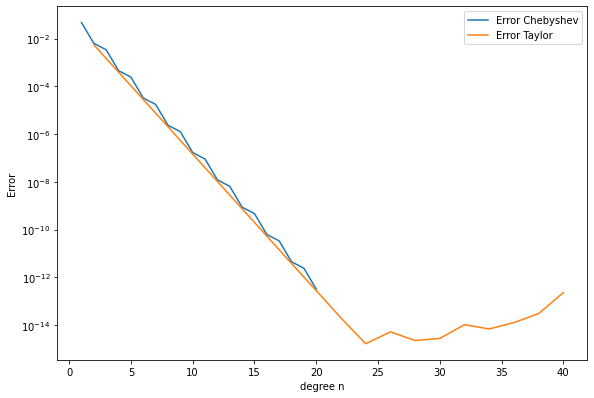

In [144]:
n = [n for n in range(1,21)]
n2 = [2*n for n in range(1,21)]
fig, ax = plt.subplots()
fig.set_size_inches(9.5, 6.5)
ax.semilogy(n, error_chebyshev, label='Error Chebyshev')
ax.semilogy(n2, error_taylor, label='Error Taylor')
ax.set(xlabel='degree n', ylabel='Error', title='')
# ax.invert_xaxis()
plt.legend()

## 3.2

In [12]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import approximate_taylor_polynomial

In [18]:
## using the neville_scheme from exercise 2
def Neville_Scheme(x, f, x_bar):
    Scheme = np.zeros((x.size, x.size))
    n = x.size - 1
    Scheme[:,0] = f
    for m in range(1,n+1):
        for j in range(0,n-m+1):
            Scheme[j][m] = ((x_bar - x[j])*Scheme[j+1][m-1] - (x_bar - x[j+m])*Scheme[j][m-1])/(x[j+m]-x[j])
    return Scheme

def f(x):
    return 1/(1+x**2)
np_f = np.vectorize(f)

In [87]:
chebyshev = {}
uniform = {}

chebyshev_knots_dict = {}
uniform_knots_dict = {}

for n in (10,20,40):
    chebyshev_knots = [5*math.cos(math.pi*(i + 0.5)/(n+1)) for i in range(0, n+1)]
    chebyshev_knots = np.array(chebyshev_knots)
    
    uniform_knots = [5*(-1+2*i/n) for i in range(0, n+1)]
    uniform_knots = np.array(uniform_knots)
    
    f_values_chebyshev = np.array(np_f(chebyshev_knots))
    f_values_uniform = np.array(np_f(uniform_knots))
    
    chebyshev_eval = []
    uniform_eval = []
    
    eval_points = np.linspace(-5,5,100)
    for eval_point in eval_points:
        chebyshev_scheme = Neville_Scheme(chebyshev_knots, f_values_chebyshev, eval_point)
        uniform_scheme = Neville_Scheme(uniform_knots, f_values_uniform, eval_point)
        chebyshev_eval.append(chebyshev_scheme[0][n])
        uniform_eval.append(uniform_scheme[0][n])
    
    chebyshev[str(n)] = chebyshev_eval
    uniform[str(n)] = uniform_eval   
    
    chebyshev_knots_dict[str(n)] = chebyshev_knots
    uniform_knots_dict[str(n)] = uniform_knots

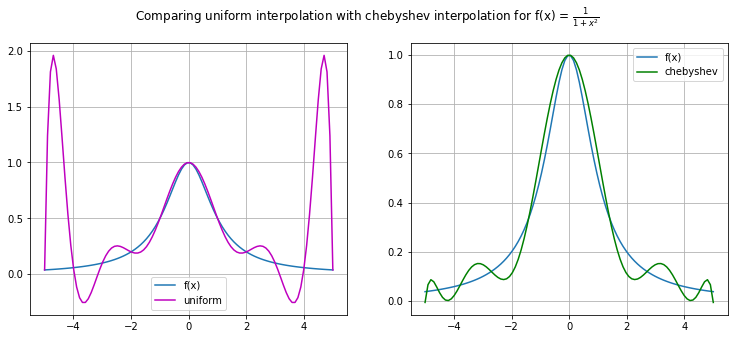

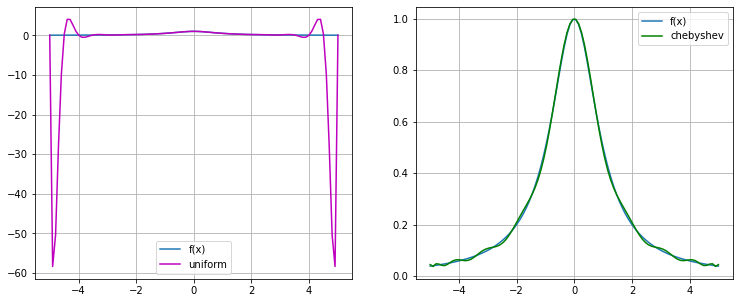

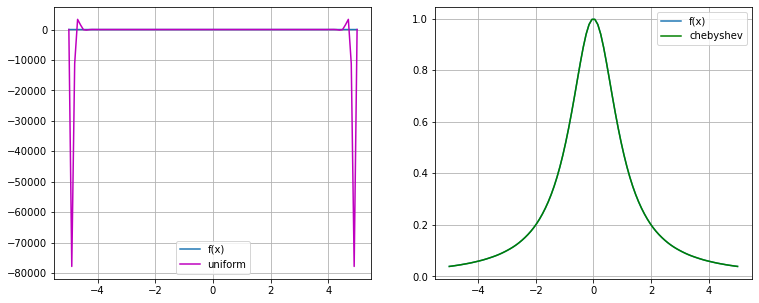

In [86]:
for n in (10,20,40):    
    fig, (ax1, ax2) = plt.subplots(1,2)
    if n==10:
        fig.suptitle('Comparing uniform interpolation with chebyshev interpolation for f(x) = $\\frac{1}{1+x^2}$')
    fig.set_size_inches(12.5, 5)
    ax1.plot(eval_points , np_f(eval_points), label='f(x)')
    ax1.plot(eval_points , uniform[str(n)], label='uniform', color='m')
    ax2.plot(eval_points , np_f(eval_points), label='f(x)')
    ax2.plot(eval_points , chebyshev[str(n)], label='chebyshev',color='g')
    ax1.grid()
    ax2.grid()
    ax1.legend()
    ax2.legend()

### b)

The Lebesgue constant:

$$ \Lambda_n := \max_{x\in[-5,5]}\sum_{i=0}^n|\mathscr{l}_i(x)| $$

$$ \mathscr{l}_i(x) = \prod_{j=0,j\neq i}^n \frac{x - x_j}{x_i - x_j} $$


In [119]:
def lagrange(x, knots, i):
    factors = [(x-knot)/(knots[i]-knot) if knot != knots[i] else 1 for knot in knots]
    return np.prod(factors)

In [167]:
eval_points = np.linspace(-5,5,100)
lebesgue_uniform = []
lebesgue_chebyshev = []
for n in (10,20,40):
    cheb_lagrange_sum_list = []
    unif_lagrange_sum_list = []
    
    for eval_point in eval_points:
        
        cheb_lagrange_sum = 0
        unif_lagrange_sum = 0
        
        for i in range(0,n+1):
            cheb_lagrange_sum = cheb_lagrange_sum + abs(lagrange(eval_point, chebyshev_knots_dict[str(n)], i))
            unif_lagrange_sum = unif_lagrange_sum + abs(lagrange(eval_point, uniform_knots_dict[str(n)], i))
            
        cheb_lagrange_sum_list.append(cheb_lagrange_sum)
        unif_lagrange_sum_list.append(unif_lagrange_sum)
        
    lebesgue_uniform.append(max(unif_lagrange_sum_list))
    lebesgue_chebyshev.append(max(cheb_lagrange_sum_list))

2.4894303768819883
29.89704700167993
2.9008249044469103
10714.424047444885
3.326682184137378
3494051285.9182057


### c)
$$ \Lambda_n \approx Ce^{nb} $$
$$ \log(\Lambda_n) \approx \log(C) + bn $$

In [168]:
print(lebesgue_uniform)

[29.89704700167993, 10714.424047444885, 3494051285.9182057]


LSEQ =

$$ \log(\Lambda_{20}) \approx log(C) + 20 b $$
$$ \log(\Lambda_{40}) \approx log(C) + 40 b $$

$$ C = e^a$$

In [201]:
a = np.array([[1, 20], [1, 40]])
b = np.array([math.log(lebesgue_uniform[1]), math.log(lebesgue_uniform[2])])

x = np.linalg.solve(a,b)

x

array([-3.41563542,  0.63474908])

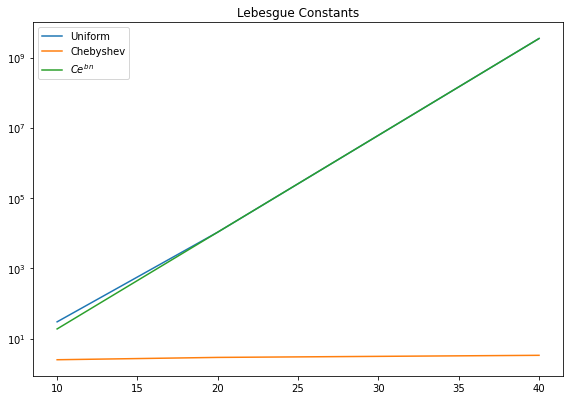

In [211]:
fig, ax = plt.subplots()
fig.set_size_inches(9.5, 6.5)
n = np.array((10,20,40))
ax.semilogy(n, lebesgue_uniform, label='Uniform')
ax.semilogy(n, lebesgue_chebyshev , label='Chebyshev')
ax.semilogy(n, np.array((math.e**((x[0]+x[1]*n))), dtype=np.float64) , label='$Ce^{bn}$')
plt.title('Lebesgue Constants')
plt.legend()

## 3.4
    
    

In [336]:
def T(f, N, a ,b):
    h = float((b-a)/N)
    #print((f(a)/2 + sum([f(a + i*h) for i in range(1,N)]) + f(b)/2)*h)
    return (f(a)/2 + sum([f(a + i*h) for i in range(1,N)]) + f(b)/2)*h

def f1(x):
    return x**2

def f2(x):
    return abs(x)

def f3(x):
    if x < 1/3:
        return (1/2)*math.e**x
    else:
        return math.e**x
    
def f4(x):
    return math.sin(math.pi*x)

def f5(x):
    return math.sin(4*math.pi*x)

h = [2/2**i for i in range(1,21)]
h = np.array(h)

error_f1 = [abs(2/3-T(f1, 2**N, -1, 1)) for N in range(1,21)]
error_f2 = [abs(1-T(f2, 2**N, -1, 1)) for N in range(1,21)]
error_f3 = [abs(math.e-1/2*math.e**(1/3)-1/(2*math.e) - T(f3, 2**N, -1, 1)) for N in range(1,21)]
error_f4 = [abs(T(f4, 2**N, -1, 1)) for N in range(1,21)]
error_f5 = [abs(T(f5, 2**N, -1, 1)) for N in range(1,21)]

Text(0.5, 0.98, 'Absolute errors of f1 to f5')

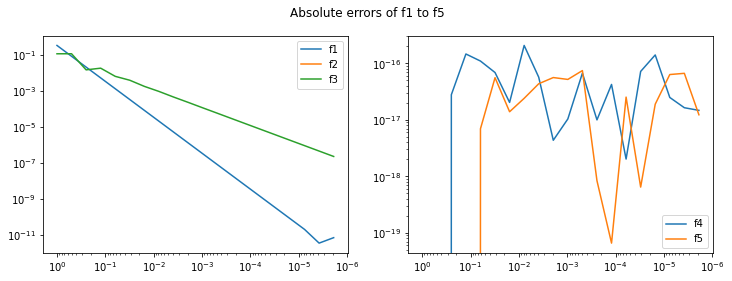

In [340]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(12, 4)
ax1.loglog(h,error_f1, label='f1')
ax1.loglog(h,error_f2, label='f2')
ax1.loglog(h,error_f3, label='f3')
ax2.loglog(h,error_f4, label='f4')
ax2.loglog(h,error_f5, label='f5')
#ax.loglog(h,abs_error_R, label='Box Rule')
ax.set(xlabel='Stepsize h(i)', ylabel='Absolute error', title='Comparison of Errors for Trapezoidal and Box Rule (f = e^x (0,1))')
ax1.invert_xaxis()
ax2.invert_xaxis()
ax1.legend()
ax2.legend()
fig.suptitle('Absolute errors of f1 to f5')